# Inspiration from lectures for solution
## Module 5.1, first video

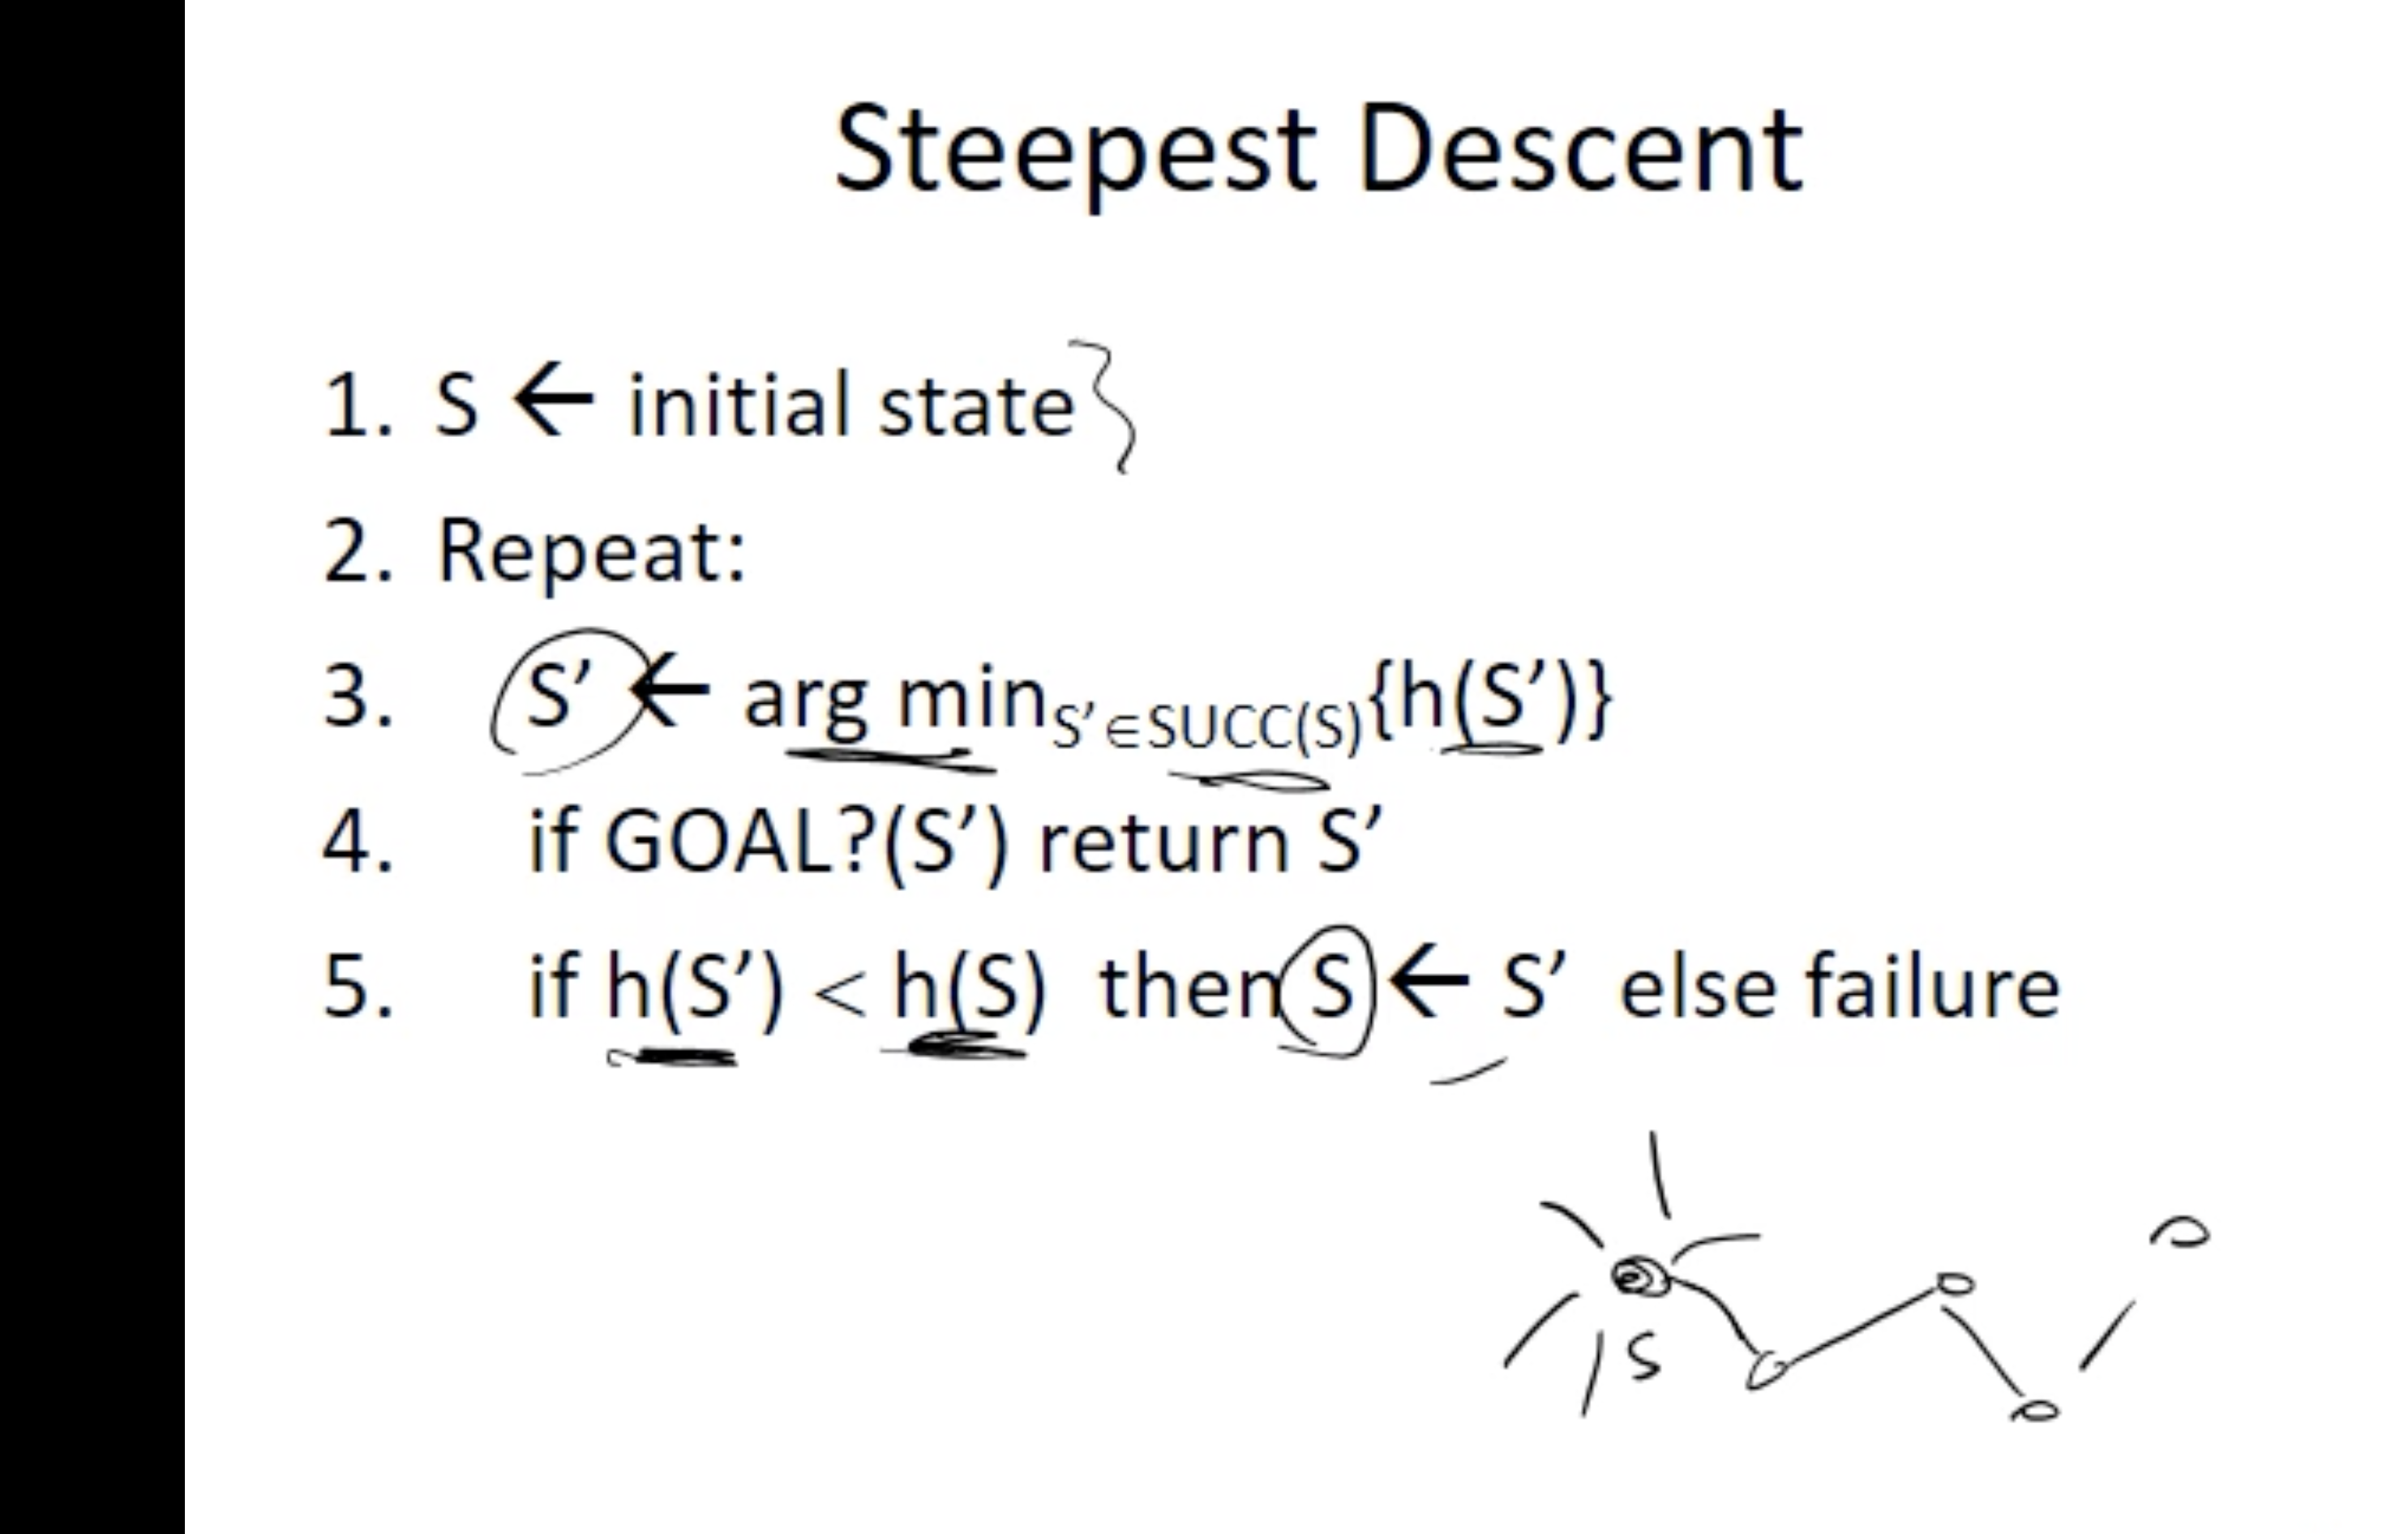

In [1]:
from IPython.display import Image
Image(filename='local_search1.png') 

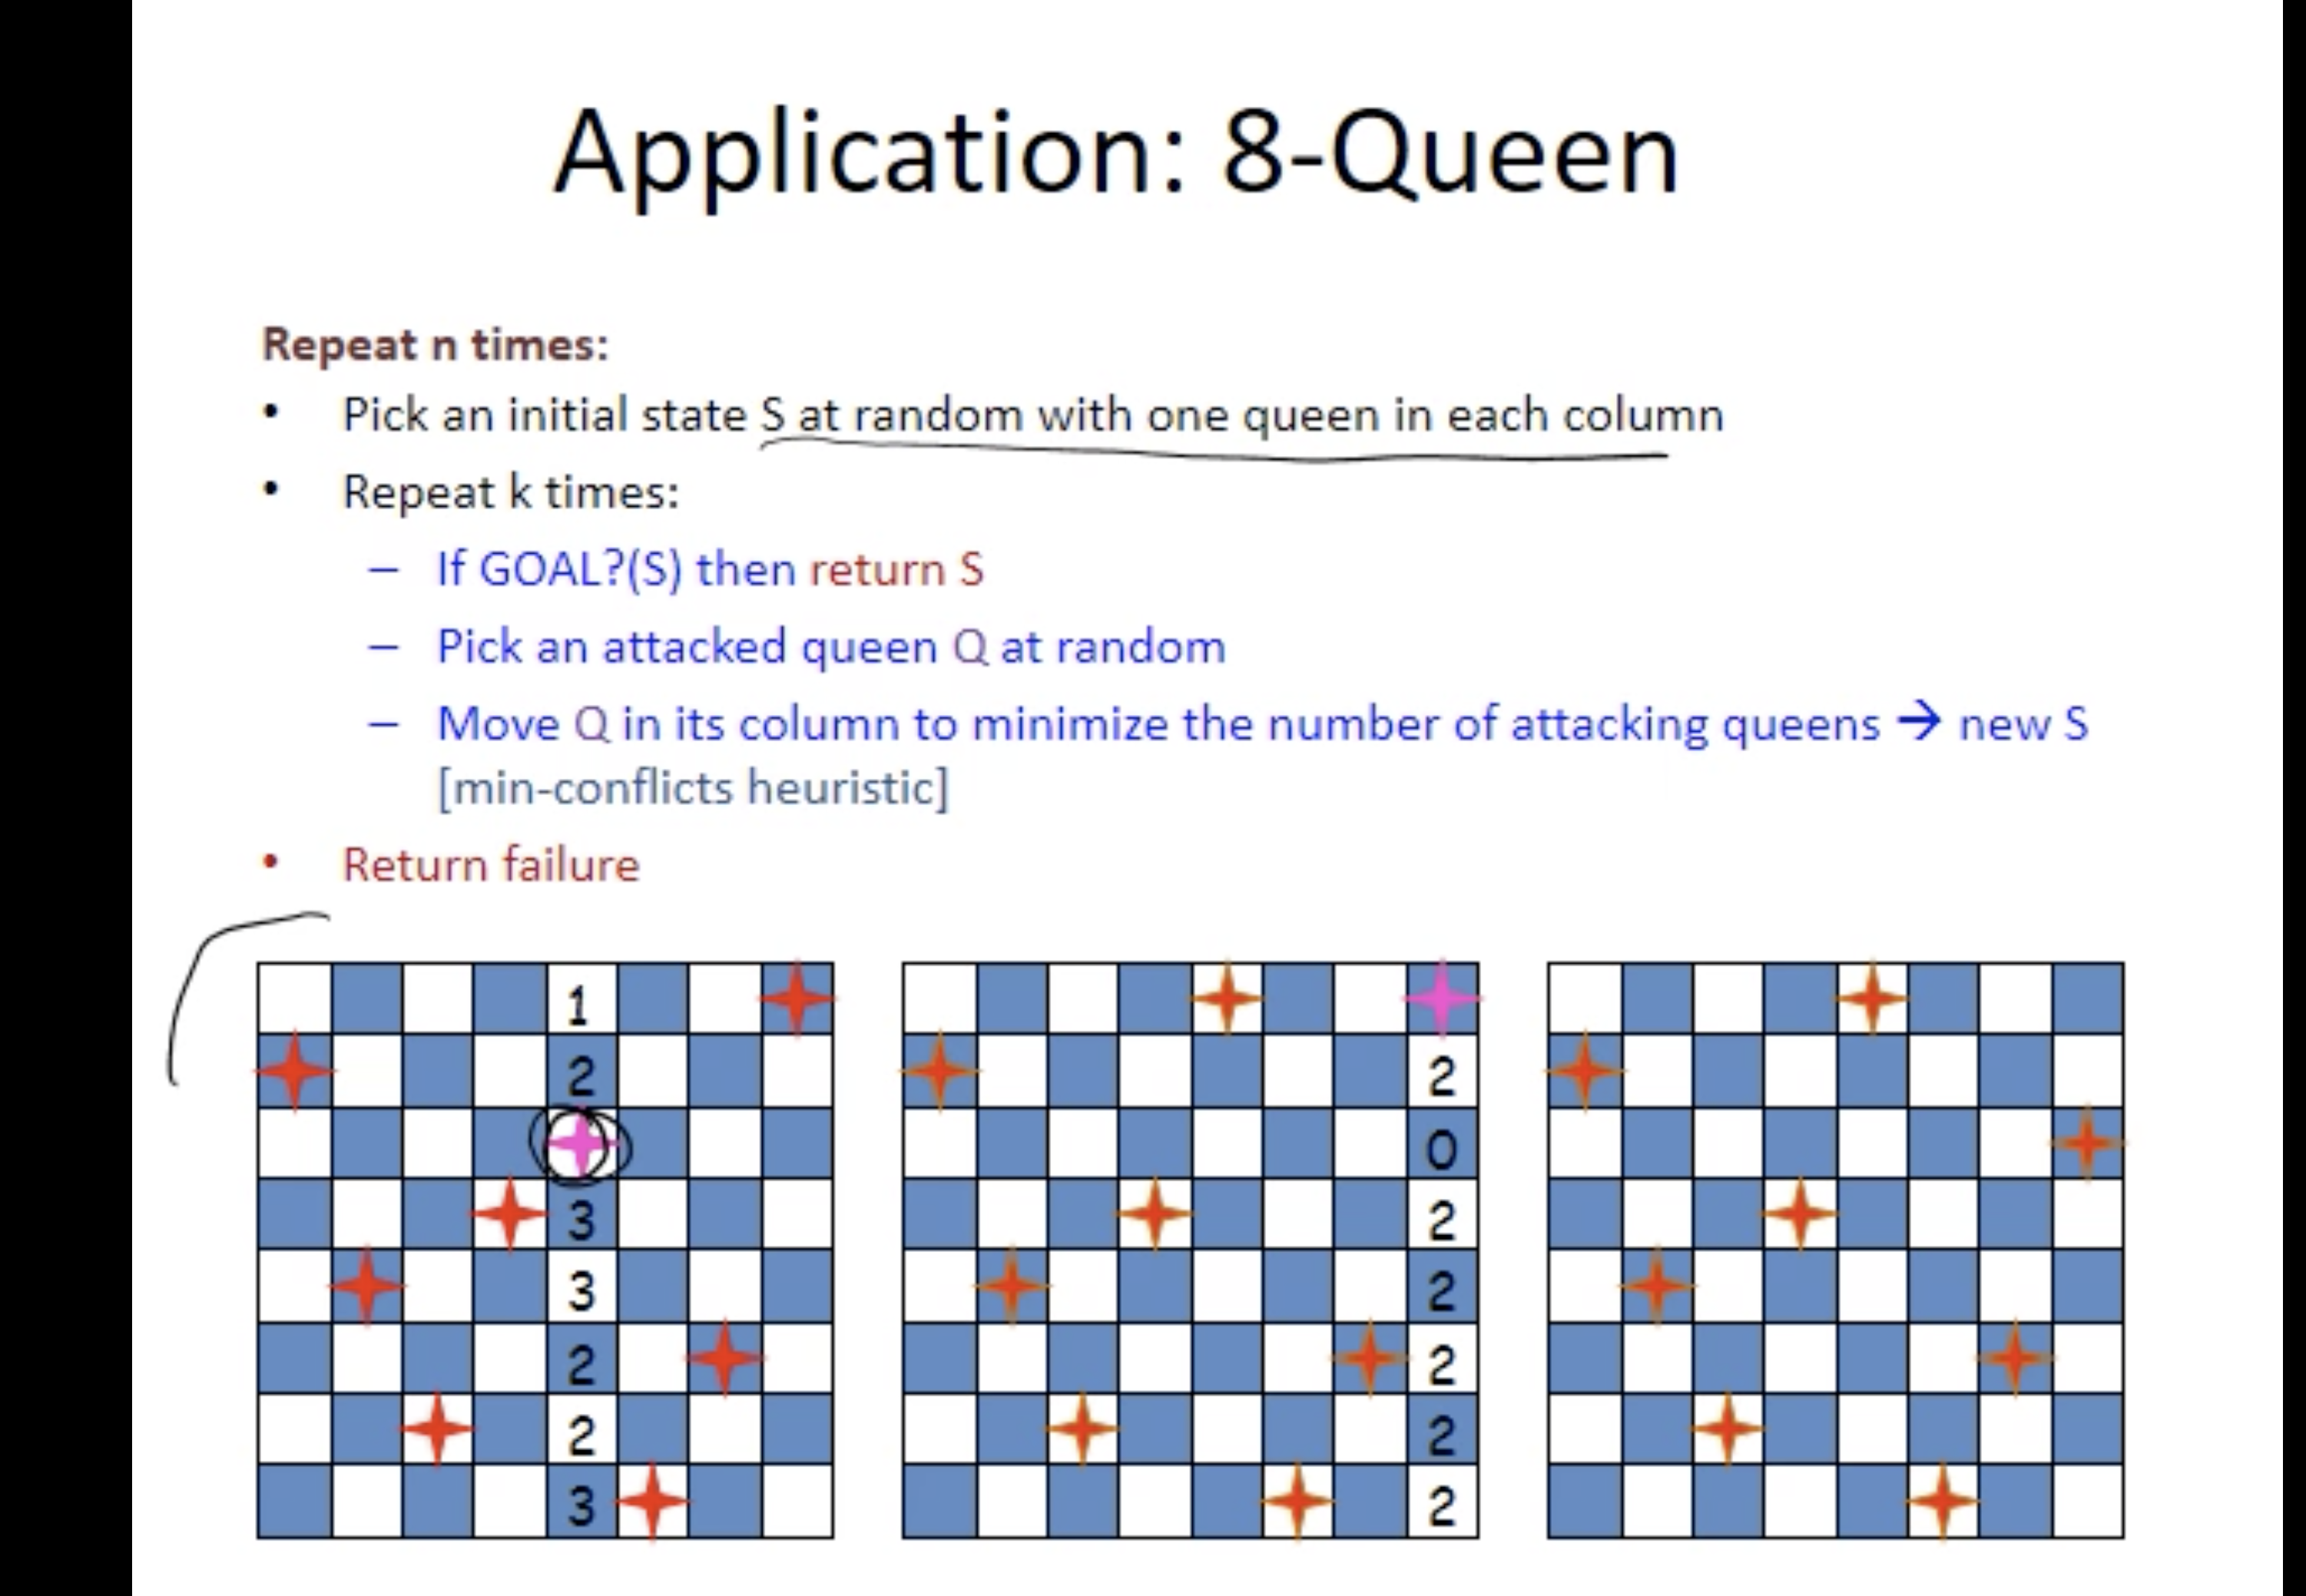

In [2]:
Image(filename='local_search2.png')

In [7]:
import random

def parse_file(filename):
    members = []
    req_teams = {}
    req_excludes = {}
    
    with open(filename, "r") as f:
        for line in f.readlines():
            entry = line.rstrip("\n").split(" ")
            members.append(entry[0])
            req_teams[entry[0]] = sorted(entry[1].split('-'))
            req_excludes[entry[0]] = sorted(entry[2].split(','))
        
    return members, req_teams, req_excludes

def random_start(members):
    result = []

    while len(members) > 0:
        random.shuffle(members)
        if len(members) >= 3:
            result.append(sorted(members[0:3]))
            del members[0:3]
        else:
            result.append(sorted(members[0:]))
            del members[0:]
    
    return result

def random_start2(members):
    result = []
    random.shuffle(members)
    return [[member] for member in members]

def successors(s):
    s_prime_list = []
    for group in s:
        other_groups = [x for x in s if x != group]
        for other_group in other_groups:
            remaining_groups = [y for y in other_groups if y != other_group]
            set_to_add = [group + other_group] + remaining_groups
            lengths = [len(x) for x in set_to_add]
            if max(lengths) <= 3:
                s_prime_list.append(set_to_add)
    return s_prime_list

def cost(s, reqs, excls):
    group_size_cost = 0
    member_cost = 0
    exclusion_cost = 0
    for group in s:
        for member in group:
            if len(group) != len(reqs[member]):
                group_size_cost +=1

            for req_teammate in reqs[member]:
                if req_teammate == 'zzz':
                    break
                if req_teammate not in group:
                    member_cost +=1

            for req_exclusion in excls[member]:
                if req_exclusion in group:
                    exclusion_cost +=2

    return group_size_cost + member_cost + exclusion_cost

def solver(input_file):
    """
    1. This function should take the name of a .txt input file in the format indicated in the assignment.
    2. It should return a dictionary with the following keys:
        - "assigned-groups" : a list of groups assigned by the program, each consisting of usernames separated by hyphens
        - "total-cost" : total cost (number of complaints) in the group assignment
    3. Do not add any extra parameters to the solver() function, or it will break our grading and testing code.
    4. Please do not use any global variables, as it may cause the testing code to fail.
    5. To handle the fact that some problems may take longer than others, and you don't know ahead of time how
       much time it will take to find the best solution, you can compute a series of solutions and then
       call "yield" to return that preliminary solution. Your program can continue yielding multiple times;
       our test program will take the last answer you 'yielded' once time expired.
    """
    members, reqs, excls = parse_file(input_file)
    s = random_start2(members)
    best_cost = cost(s, reqs, excls)
    yield({"assigned-groups": ['-'.join(x) for x in s],
               "total-cost" : best_cost})
    
    for n in range(10):
        s = random_start2(members)
        if cost(s, reqs, excls) < best_cost:
            best_cost = cost(s, reqs, excls)
            yield({"assigned-groups": ['-'.join(x) for x in s],
                   "total-cost" : cost(s, reqs, excls)})

        for k in range(100):
            s_prime_list = successors(s)
            s_p_costs = [cost(sp, reqs, excls) for sp in s_prime_list]

            if min(s_p_costs) < best_cost:
                best_cost = min(s_p_costs)
                min_index = s_p_costs.index(min(s_p_costs))
                s = s_prime_list[min_index]
                yield({"assigned-groups": ['-'.join(x) for x in s],
                       "total-cost" : best_cost})
        
        
    # Simple example. First we yield a quick solution
    #yield({"assigned-groups": ["vibvats-djcran-zkachwal", "shah12", "vrmath"],
     #          "total-cost" : 12})

    # Then we think a while and return another solution:
    #time.sleep(10)
    #yield({"assigned-groups": ["vibvats-djcran-zkachwal", "shah12-vrmath"],
              # "total-cost" : 10})

    # This solution will never befound, but that's ok; program will be killed eventually by the
    #  test script.
   # while True:
       # pass
    
  #  yield({"assigned-groups": ["vibvats-djcran", "zkachwal-shah12-vrmath"],
      #         "total-cost" : 9})

In [8]:
for result in solver('test1.txt'):
        print("----- Latest solution:\n" + "\n".join(result["assigned-groups"]))
        print("\nAssignment cost: %d \n" % result["total-cost"])

----- Latest solution:
sahmaini
vkvats
djcran
sulagaop
fanjun
nthakurd

Assignment cost: 7 

----- Latest solution:
djcran-vkvats
sahmaini
sulagaop
nthakurd
fanjun

Assignment cost: 5 

----- Latest solution:
djcran-vkvats-sulagaop
sahmaini
nthakurd
fanjun

Assignment cost: 4 



In [184]:
members, reqs, excls = parse_file('test1.txt')
s = random_start2(members)
s

[['sulagaop'], ['vkvats'], ['nthakurd'], ['sahmaini'], ['fanjun'], ['djcran']]

In [185]:
cost(s, reqs, excls)

7

In [187]:
s = random_start2(members)
for n in range(150):
    best_cost = cost(s,reqs, excls)
    s_prime_list = successors(s)
    s_p_costs = [cost(sp, reqs, excls) for sp in s_prime_list]
    if min(s_p_costs) < best_cost:
        best_cost = min(s_p_costs)
        min_index = s_p_costs.index(min(s_p_costs))
        s = s_prime_list[min_index]
        print('new best config', s)
        print('new best cost', best_cost)
    
    

new best config [['vkvats', 'djcran'], ['sulagaop'], ['sahmaini'], ['nthakurd'], ['fanjun']]
new best cost 5
new best config [['vkvats', 'djcran', 'sulagaop'], ['sahmaini'], ['nthakurd'], ['fanjun']]
new best cost 4


In [190]:
{'assigned-groups':['-'.join(x) for x in s]}

{'assigned-groups': ['vkvats-djcran-sulagaop',
  'sahmaini',
  'nthakurd',
  'fanjun']}

In [130]:
group_size_cost = 0
member_cost = 0
exclusion_cost = 0
for group in s:
    print('\n\n*********************************************')
    print('Group: ', group)
    for member in group:
        print('_____________')
        print('\nCurrent Member: ', member)
        print('Requested group size: ', len(reqs[member]))
        print('\nChecking if group size is correct')
        if len(group) != len(reqs[member]):
            print('group size was incorrect, adding one to cost')
            group_size_cost +=1
            
        for req_teammate in reqs[member]:
            if req_teammate == 'zzz':
                break
            print('\nRequested member: ', req_teammate)
            print('checking if', req_teammate, 'is in ', group)
            if req_teammate not in group:
                print('found error, adding one to cost')
                member_cost +=1
                
        for req_exclusion in excls[member]:
            print('\nThe requested excluded person is: ', req_exclusion)
            print('Checking if', req_exclusion, 'is in the group')
            if req_exclusion in group:
                print("This person requested not to work with", req_exclusion)
                exclusion_cost +=2
                
print('\n***********************\nGroup size cost is: ',group_size_cost)
print('Membership cost is :', member_cost)
print('Exclusions cost is :', exclusion_cost)
print('Total cost is: ', group_size_cost + member_cost + exclusion_cost)



*********************************************
Group:  ['sulagaop', 'djcran', 'sahmaini']
_____________

Current Member:  sulagaop
Requested group size:  3

Checking if group size is correct

Requested member:  sulagaop
checking if sulagaop is in  ['sulagaop', 'djcran', 'sahmaini']

The requested excluded person is:  _
Checking if _ is in the group
_____________

Current Member:  djcran
Requested group size:  3

Checking if group size is correct

Requested member:  djcran
checking if djcran is in  ['sulagaop', 'djcran', 'sahmaini']

Requested member:  nthakurd
checking if nthakurd is in  ['sulagaop', 'djcran', 'sahmaini']
found error, adding one to cost

Requested member:  vkvats
checking if vkvats is in  ['sulagaop', 'djcran', 'sahmaini']
found error, adding one to cost

The requested excluded person is:  sahmaini
Checking if sahmaini is in the group
This person requested not to work with sahmaini
_____________

Current Member:  sahmaini
Requested group size:  1

Checking if group si

In [ ]:
'-'.join(members[0:3])
del members[0:3]
[members.pop(0)]

In [ ]:
# Based on skeleton code by R. Shah and D. Crandall, January 2021
#

import sys
import time

def solver(input_file):
    """
    1. This function should take the name of a .txt input file in the format indicated in the assignment.
    2. It should return a dictionary with the following keys:
        - "assigned-groups" : a list of groups assigned by the program, each consisting of usernames separated by hyphens
        - "total-cost" : total cost (number of complaints) in the group assignment
    3. Do not add any extra parameters to the solver() function, or it will break our grading and testing code.
    4. Please do not use any global variables, as it may cause the testing code to fail.
    5. To handle the fact that some problems may take longer than others, and you don't know ahead of time how
       much time it will take to find the best solution, you can compute a series of solutions and then
       call "yield" to return that preliminary solution. Your program can continue yielding multiple times;
       our test program will take the last answer you 'yielded' once time expired.
    """

    # Simple example. First we yield a quick solution
    yield({"assigned-groups": ["vibvats-djcran-zkachwal", "shah12", "vrmath"],
               "total-cost" : 12})

    # Then we think a while and return another solution:
    time.sleep(10)
    yield({"assigned-groups": ["vibvats-djcran-zkachwal", "shah12-vrmath"],
               "total-cost" : 10})

    # This solution will never befound, but that's ok; program will be killed eventually by the
    #  test script.
    while True:
        pass
    
    yield({"assigned-groups": ["vibvats-djcran", "zkachwal-shah12-vrmath"],
               "total-cost" : 9})

if __name__ == "__main__":
    if(len(sys.argv) != 2):
        raise(Exception("Error: expected an input filename"))

    for result in solver(sys.argv[1]):
        print("----- Latest solution:\n" + "\n".join(result["assigned-groups"]))
        print("\nAssignment cost: %d \n" % result["total-cost"])